In [131]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds_salary = pd.read_csv("ds_salaries.csv")
ds_salary.drop("id", axis=1, inplace=True)
ds_salary.drop('salary', axis=1, inplace=True)
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [132]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_currency     607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [133]:
ds_salary.shape

(607, 10)

In [134]:
# # replace the experience level with the full name for better understanding
# ds_salary["experience_level"] = ds_salary["experience_level"].replace("EN", "Entry-Level")
# ds_salary["experience_level"] = ds_salary["experience_level"].replace("MI", "Mid-Level")
# ds_salary["experience_level"] = ds_salary["experience_level"].replace("SE", "Senior-Level")
# ds_salary["experience_level"] = ds_salary["experience_level"].replace("EX", "Executive-Level")

# # replace the employment type with the full name for better understanding
# ds_salary["employment_type"] = ds_salary["employment_type"].replace("FT", "Full-Time")
# ds_salary["employment_type"] = ds_salary["employment_type"].replace("PT", "Part-Time")
# ds_salary["employment_type"] = ds_salary["employment_type"].replace("CT", "Contract")
# ds_salary["employment_type"] = ds_salary["employment_type"].replace("FL", "Freelance")

# Feature Engineering
ds_salary['experience_level'] = ds_salary['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
ds_salary['employment_type'] = ds_salary['employment_type'].map({'FT': 1, 'PT': 2, 'CT': 3, 'FL': 4})
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].map({0: 1, 50: 2, 100: 3})
ds_salary['company_size'] = ds_salary['company_size'].map({'S': 1, 'M': 2, 'L': 3})

# Bucket outliers
ds_salary["job_title"] = ds_salary["job_title"].apply(lambda x: x if ds_salary["job_title"].value_counts()[x] > 10 else "Other")
ds_salary["job_title"].value_counts()

job_title
Other                        155
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: count, dtype: int64

In [135]:
# New binary column for when employee_residence and company_location are the same
ds_salary['fe_same_location'] = np.where(ds_salary['employee_residence'] == ds_salary['company_location'], 1, 0)
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,fe_same_location
0,2020,2,1,Data Scientist,EUR,79833,DE,1,DE,3,1
1,2020,3,1,Other,USD,260000,JP,1,JP,1,1
2,2020,3,1,Other,GBP,109024,GB,2,GB,2,1
3,2020,2,1,Other,USD,20000,HN,1,HN,1,1
4,2020,3,1,Machine Learning Engineer,USD,150000,US,2,US,3,1


In [136]:
# mean salary for cluster
ds_salary['fe_mean_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'fe_same_location'])['salary_in_usd'].transform('mean')

# min salary for cluster
ds_salary['fe_min_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'fe_same_location'])['salary_in_usd'].transform('min')

# max salary for cluster
ds_salary['fe_max_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'fe_same_location'])['salary_in_usd'].transform('max')

ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,fe_same_location,fe_mean_country_salary,fe_min_country_salary,fe_max_country_salary
0,2020,2,1,Data Scientist,EUR,79833,DE,1,DE,3,1,60157.0,40481,79833
1,2020,3,1,Other,USD,260000,JP,1,JP,1,1,260000.0,260000,260000
2,2020,3,1,Other,GBP,109024,GB,2,GB,2,1,109024.0,109024,109024
3,2020,2,1,Other,USD,20000,HN,1,HN,1,1,20000.0,20000,20000
4,2020,3,1,Machine Learning Engineer,USD,150000,US,2,US,3,1,150000.0,150000,150000


In [137]:
X = ds_salary.drop("salary_in_usd", axis=1)
y = ds_salary["salary_in_usd"]

In [138]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import make_pipeline

# # num_attribs = ["work_year", "remote_ratio"]
cat_attribs = ["employee_residence", "company_location", "job_title", "salary_currency"]

# # num_pipeline = make_pipeline(StandardScaler())
# cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# preprocessing = ColumnTransformer([('cat', cat_pipeline, cat_attribs)])

# ds_prepared = preprocessing.fit_transform(X)

# print(ds_prepared.shape)
# print(preprocessing.get_feature_names_out())

# one hot encoding
X = pd.get_dummies(X, columns=cat_attribs)

X.head()


,work_year,experience_level,employment_type,remote_ratio,company_size,fe_same_location,fe_mean_country_salary,fe_min_country_salary,fe_max_country_salary,employee_residence_AE,...,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,2020,2,1,1,3,1,60157.0,40481,79833,False,...,True,False,False,False,False,False,False,False,False,False
1,2020,3,1,1,1,1,260000.0,260000,260000,False,...,False,False,False,False,False,False,False,False,False,True
2,2020,3,1,2,2,1,109024.0,109024,109024,False,...,False,True,False,False,False,False,False,False,False,False
3,2020,2,1,1,1,1,20000.0,20000,20000,False,...,False,False,False,False,False,False,False,False,False,True
4,2020,3,1,2,3,1,150000.0,150000,150000,False,...,False,False,False,False,False,False,False,False,False,True


In [139]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.log(y)

# def linear_regression(X, y):
#     linear = LinearRegression()
#     linear.fit(X, y)
#     return linear

def ridge_regression(X, y):
    ridge = Ridge(random_state=42)
    ridge.fit(X, y)
    return ridge

def sgd_regression(X, y):
    sgd = SGDRegressor(random_state=42)
    sgd.fit(X, y)
    return sgd

def random_forest_regression(X, y):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    return rf


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear = linear_regression(X_train, y_train)
linear_pred = linear.predict(X_test)
ridge = ridge_regression(X_train, y_train)
ridge_pred = ridge.predict(X_test)
sgd = sgd_regression(X_train, y_train)
sgd_pred = sgd.predict(X_test)
rf = random_forest_regression(X_train, y_train)
rf_pred = rf.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error

# print("Linear Regression MSE: ", mean_squared_error(y_test, linear_pred))
# print("Ridge Regression MSE: ", mean_squared_error(y_test, ridge_pred)**0.5)
# print("SGD Regression MSE: ", mean_squared_error(y_test, sgd_pred)**0.5)
# print("Random Forest Regression MSE: ", mean_squared_error(y_test, rf_pred)**0.5)

print("Ridge Regression MSE: ", mean_squared_error(y_test, ridge_pred))
print("SGD Regression MSE: ", mean_squared_error(y_test, sgd_pred))
print("Random Forest Regression MSE: ", mean_squared_error(y_test, rf_pred))

Ridge Regression MSE:  0.19725377418055814
SGD Regression MSE:  0.4231541951213467
Random Forest Regression MSE:  0.12512910810088332


In [142]:
# r scores
from sklearn.metrics import r2_score

# print("Linear Regression R2: ", r2_score(y_test, linear_pred))
print("Ridge Regression R2: ", r2_score(y_test, ridge_pred))
print("SGD Regression R2: ", r2_score(y_test, sgd_pred))
print("Random Forest Regression R2: ", r2_score(y_test, rf_pred))


Ridge Regression R2:  0.7195537582301159
SGD Regression R2:  0.398379046464711
Random Forest Regression R2:  0.8220972539121685


In [143]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_grid_pred = rf_grid.predict(X_test)
print("Random Forest Regression GridSearchCV MSE: ", mean_squared_error(y_test, rf_grid_pred))
print("Random Forest Regression GridSearchCV R2: ", r2_score(y_test, rf_grid_pred))

Random Forest Regression GridSearchCV MSE:  0.12305886722301645
Random Forest Regression GridSearchCV R2:  0.8250406261045033


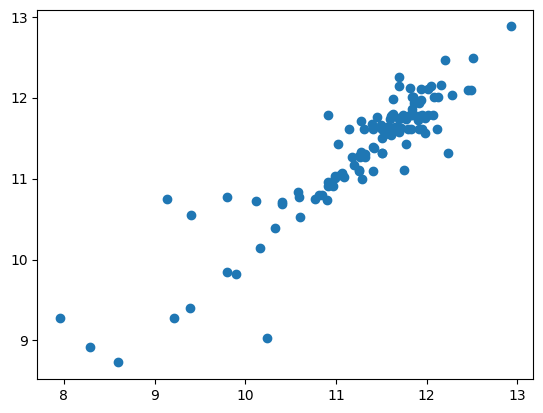

In [144]:
# plot actual vs predicted
plt.scatter(y_test, rf_grid_pred)

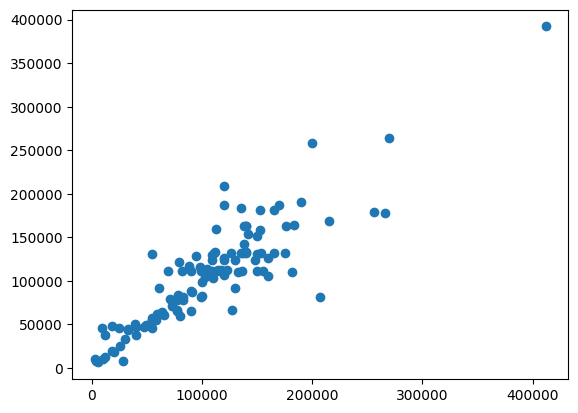

In [145]:
# remove log transformations on the target
y_test = np.exp(y_test)
rf_grid_pred = np.exp(rf_grid_pred)
plt.scatter(y_test, rf_grid_pred)